In [1]:
#Dependencies
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator, AutoDateLocator, YEARLY
from matplotlib.ticker import LinearLocator

In [2]:
#import csv
og_df = pd.read_csv("Resources/results.csv")
og_df.head()

FileNotFoundError: [Errno 2] File Resources/results.csv does not exist: 'Resources/results.csv'

In [3]:
#names of all columns
print(og_df.columns)

NameError: name 'og_df' is not defined

In [4]:
#new dataframe without other columns from csv

fatal_df = og_df.drop(columns = ['grid', 'fastestLapSpeed', 'fastestLapTime', 'fastestLap', 'milliseconds', 'time', 'laps', 'points', 'positionOrder', 'positionText'])
fatal_df.head()

NameError: name 'og_df' is not defined

In [ ]:
fatal_df.describe()

,resultId,raceId,driverId,constructorId,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,17.568576
std,7460.682031,299.440908,268.623016,59.732131,26.155520
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,1.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000
75%,19380.250000,784.000000,360.000000,58.000000,14.000000
max,25845.000000,1096.000000,856.000000,214.000000,141.000000


In [ ]:
#np.arange(8) == np.arange(8).astype(str)
fatal_df.dtypes

resultId          int64
raceId            int64
driverId          int64
constructorId     int64
number           object
position         object
rank             object
statusId          int64
dtype: object

In [ ]:
fatal_2_df = 0
for i in fatal_df["statusId"]:
    if i == 104:
        fatal_2_df = fatal_2_df+1

print(fatal_2_df)

3


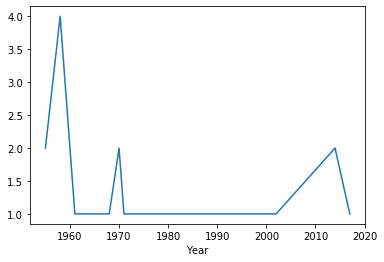

In [ ]:
#API for wikipedia data
url = "https://en.wikipedia.org/wiki/List_of_Formula_One_fatalities"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='wikitable plainrowheaders sortable')

fatalitiesdf = pd.read_html(str(table))
fatalitiesdf = pd.concat(fatalitiesdf)
df_new = fatalitiesdf.drop(fatalitiesdf[(fatalitiesdf['Session'] == 'Test') | (fatalitiesdf['Session'] == 'Practice') | (fatalitiesdf['Session'] == 'Qualifying') | (fatalitiesdf['Session'] == 'Run')].index)

df_new['Year'] = pd.to_datetime(df_new['Date of accident']).dt.year
group = df_new.groupby('Year')['Driver'].count()
group.plot()

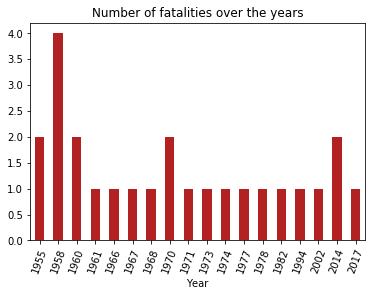

In [ ]:
#plt.bar(group, height=5, width=0.8, y=['Date of accident'])

group.plot.bar(x="Fatalaties", y="Date of accident", rot=70, color="firebrick", title="Number of fatalities over the years")

plt.savefig('fatalatiesperyear.png')

In [ ]:
url = "https://en.wikipedia.org/wiki/1955_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

temp_df = pd.DataFrame({'Year' : '1955','Deaths': df_new['Year'].value_counts()[1955],'Competitors' : [driversdf['Driver'].count()]})
print(temp_df)

   Year  Deaths  Competitors
0  1955       2           60


In [ ]:
url = "https://en.wikipedia.org/wiki/1958_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[2]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1958','Deaths': df_new['Year'].value_counts()[1958],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)
print(temp_df)

   Year  Deaths  Competitors
0  1955       2           60
1  1958       4           80


In [ ]:
url = "https://en.wikipedia.org/wiki/1960_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1960','Deaths': df_new['Year'].value_counts()[1960],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1961_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1961','Deaths': df_new['Year'].value_counts()[1961],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1966_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1966','Deaths': df_new['Year'].value_counts()[1966],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1967_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1967','Deaths': df_new['Year'].value_counts()[1967],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1968_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1968','Deaths': df_new['Year'].value_counts()[1968],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1970_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1970','Deaths': df_new['Year'].value_counts()[1970],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1971_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1971','Deaths': df_new['Year'].value_counts()[1971],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1973_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1973','Deaths': df_new['Year'].value_counts()[1973],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1974_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1974','Deaths': df_new['Year'].value_counts()[1974],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1977_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1977','Deaths': df_new['Year'].value_counts()[1977],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1978_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1978','Deaths': df_new['Year'].value_counts()[1978],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
url = "https://en.wikipedia.org/wiki/1982_Formula_One_World_Championship"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1982','Deaths': df_new['Year'].value_counts()[1982],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)



In [ ]:

url = "https://en.wikipedia.org/wiki/1994_Formula_One_World_Championship"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[1]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '1982','Deaths': df_new['Year'].value_counts()[1982],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)


In [ ]:
url = "https://en.wikipedia.org/wiki/2002_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)

new_df = pd.DataFrame([{'Year' : '2002','Deaths': df_new['Year'].value_counts()[2002],'Competitors' : driversdf['Driver'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

In [ ]:
# 2014 and 2017 data was formatted a bit differently in that the Rows has multiple lines of data that needs to be sepearated out.

url = "https://en.wikipedia.org/wiki/2014_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)
driversdf.drop(driversdf.tail(1).index,inplace=True)

# Remove other columns that were not relevant.

driversdf = driversdf.drop(columns=['Entrant', 'Constructor', 'Chassis', 'Power unit', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])
driversdf = driversdf.set_index(['No.', 'Rounds']).apply(lambda x: x.str.split(',').explode()).reset_index()

new_df = pd.DataFrame([{'Year' : '2014','Deaths' : df_new['Year'].value_counts()[2014],'Competitors' : driversdf['Race drivers'].count()}])
temp_df = pd.concat([temp_df, new_df], ignore_index=True)

        No.                   Rounds             Race drivers
0   9461045  1–16191–11, 13–16, 1912       Marcus Ericsson[7]
1   9461045  1–16191–11, 13–16, 1912          Will Stevens[8]
2   9461045  1–16191–11, 13–16, 1912    Kamui Kobayashi[7][9]
3   9461045  1–16191–11, 13–16, 1912   André Lotterer[10][11]
4       714                   AllAll       Kimi Räikkönen[14]
5       714                   AllAll      Fernando Alonso[15]
6      1127                   AllAll         Sergio Pérez[19]
7      1127                   AllAll      Nico Hülkenberg[20]
8       813                   AllAll      Romain Grosjean[23]
9       813                   AllAll     Pastor Maldonado[23]
10  4421742       1–1612[a]1–1516[b]          Max Chilton[26]
11  4421742       1–1612[a]1–1516[b]      Alexander Rossi[27]
12  4421742       1–1612[a]1–1516[b]        Jules Bianchi[28]
13  4421742       1–1612[a]1–1516[b]      Alexander Rossi[29]
14     2022                   AllAll      Kevin Magnussen[33]
15     2

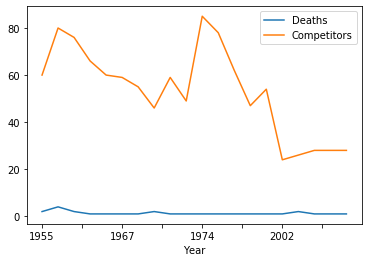

In [ ]:
# 2014 and 2017 data was formatted a bit differently in that the Rows has multiple lines of data that needs to be sepearated out.

url = "https://en.wikipedia.org/wiki/2017_Formula_One_season"

page = requests.get(url)
soup  = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]

driversdf = pd.read_html(str(table))
driversdf = pd.concat(driversdf)
driversdf = driversdf['Race drivers']

driversdf.drop(driversdf.tail(1).index,inplace=True)
driversdf = driversdf.set_index(['No.', 'Rounds']).apply(lambda x: x.str.split(',').explode()).reset_index()

new_df = pd.DataFrame({'Year' : '2017','Deaths': df_new['Year'].value_counts()[2017],'Competitors' : [driversdf['Driver name'].count()]})
temp_df = pd.concat([temp_df, new_df], ignore_index=True)
temp_df.plot(x='Year')

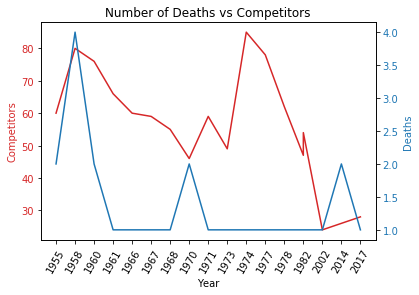

In [ ]:
#add dual axis for above figure
 
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Competitors', color=color)
ax1.plot(temp_df['Year'], temp_df['Competitors'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=60)

# add second axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Deaths', color=color)
ax2.plot(temp_df['Year'], temp_df['Deaths'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_title("Number of Deaths vs Competitors")

plt.savefig('DeathsVsCompetitors.png')